In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/data/ciss/PDSdata-2015-02-20T14-24-33-08-00/

/Users/klay6683/data/ciss/PDSdata-2015-02-20T14-24-33-08-00


In [11]:
mapnames = !ls *.map.cal.cub

In [27]:
cubnames = !ls *1.cub

In [33]:
calnames = !ls *1.cal.cub

In [12]:
from pyciss.pipeline import process_image

In [18]:
imshow(process_image(mapnames[0]))

In [52]:
def imshowlowhigh(data, low=10, high=90, title=None):
    fig, ax = plt.subplots()
    plow, phigh = np.percentile(data[~np.isnan(data)], (low, high))
    ax.imshow(data, vmin=plow, vmax=phigh, cmap='gray',interpolation='sinc')
    ax.set_title(title)
    return fig

def process_image(fname):
    import gdal
    import os
    ds = gdal.Open(fname)
    data = ds.ReadAsArray()
    try:
        data[data < -2e+38] = np.nan
    except ValueError:
        # if it's an integer image this will fail.
        pass
#     imshowlowhigh(data, title=os.path.basename(fname))
    return data

In [67]:
i = 2
process_image(cubnames[i])

array([[183,  90,  90, ...,  22,  22,  32],
       [152,  70,  72, ...,  20,  19,  27],
       [161,  70,  69, ...,  19,  20,  26],
       ..., 
       [209,  81,  83, ...,  59,  57, 117],
       [205,  82,  83, ...,  60,  58, 117],
       [214,  79,  84, ...,  57,  58, 105]], dtype=int16)

In [36]:
process_image(calnames[i])

In [39]:
process_image(mapnames[i])

In [50]:
from pyciss.plotting import myinteract

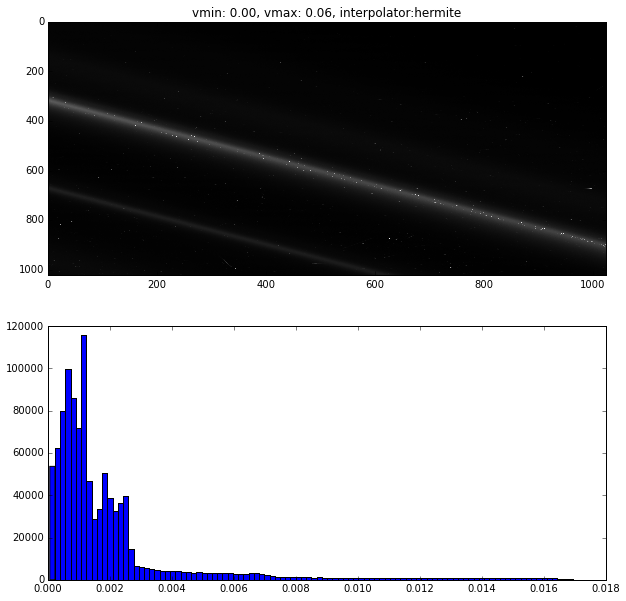

In [70]:
myinteract(process_image(calnames[4]))

In [73]:
from IPython.html.widgets import interact

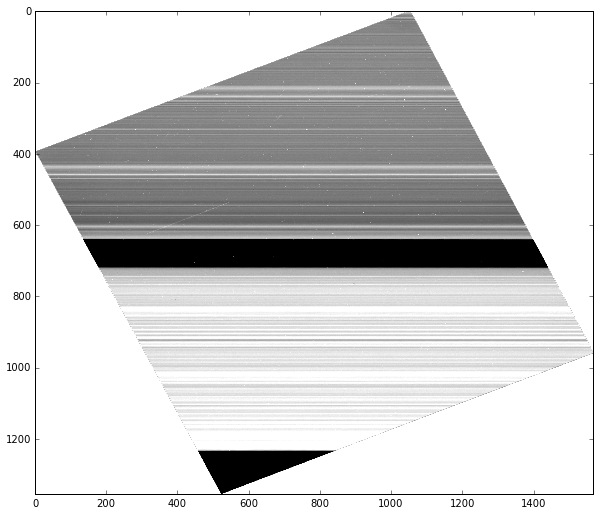

In [83]:
fnames = mapnames
def browse_images(i=0):
    import gdal
    ds = gdal.Open(fnames[i])
    data = ds.ReadAsArray()
    data[data< -2e+38] = np.nan
    p10, p90 = np.percentile(data[~np.isnan(data)], (10,90))
    plt.figure(figsize=(10,10))
    plt.imshow(data, cmap='gray', vmin=p10, vmax=p90)
    plt.show()
interact(browse_images, i=(0, len(fnames)-1))

In [85]:
data = process_image(mapnames[10])

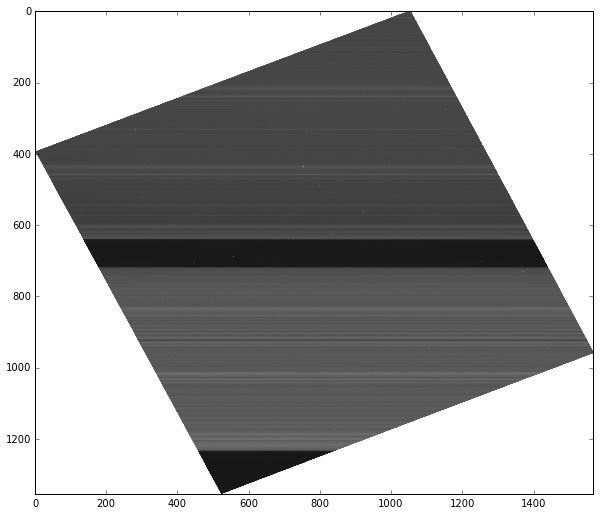

In [90]:
plt.figure(figsize=(10,10))
plt.imshow(data, cmap='gray', )

In [91]:
mean_value = np.nanmean(data, axis=1)

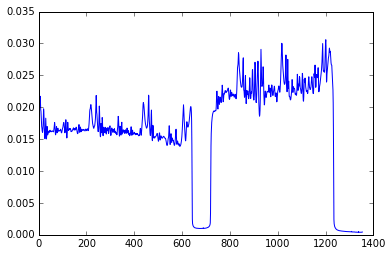

In [92]:
plt.plot(mean_value)

In [95]:
arr = np.arange(10000,dtype='float').reshape(100,100)

In [96]:
arr[10,10] = np.nan

In [98]:
from skimage.exposure import equalize_hist

In [107]:
eqimg = np.empty_like(data)
mask = ~np.isnan(data)
eqimg[mask] = equalize_hist(data[mask])
eqimg[~mask] = np.nan

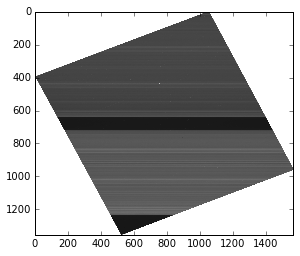

In [106]:
imshow(data,cmap='gray')

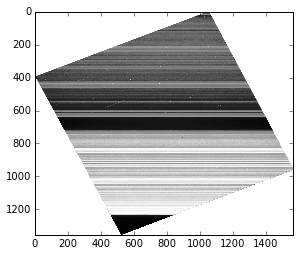

In [108]:
imshow(eqimg, cmap='gray')